<a href="https://colab.research.google.com/github/marianamartiyns/House-price-prediction/blob/main/Update_HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction - Linear Regression

# 🧩 Libraries

In [1281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

# 🗂️ Database

In [1282]:
df = pd.read_csv('/content/BostonHousing.csv')

In [1283]:
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


Pensando em ampliar meus estudos, encontrei e fiz um fork deste notebook para realizar alguns ajustes no código. Por isso, não disponho de informações sobre essa base de dados. No entanto, com base no contexto de previsibilidade de preços de casas, podemos presumir que as colunas sejam as seguintes: <br><br>

* `crim`: Taxa de criminalidade per capita por área.
* `zn`: Proporção de terrenos residenciais zonados para lotes maiores que 25.000 metros quadrados (indicando áreas com menos densidade populacional).
* `indus`: Proporção de área ocupada por indústrias não comerciais. Valores mais altos podem indicar bairros com mais indústrias.
* `chas`: Variável binária indicando se o bairro está próximo ao rio Charles (1 se o bairro está próximo, 0 caso contrário).
* `nox`: Concentração de óxidos de nitrogênio (NOx), que é uma medida de poluição do ar.
* `rm`: Número médio de quartos por residência.
* `age`: Idade da casa.
* `dis`: Distância ponderada das cinco principais atrações de emprego de Boston.
* `rad`: Índice de acessibilidade às rodovias radiais.
* `tax`: Taxa de imposto sobre propriedades de valor total.
* `ptratio`: Razão aluno-professor nas escolas da cidade.
* `b`: Proporção de pessoas de ascendência afro-americana na população.
* `lstat`: Percentual de residentes com status socioeconômico baixo.
* `medv`: Mediana dos valores das casas ocupadas pelos proprietários em milhares de dólares (variável alvo do modelo, ou seja, o preço médio das casas).

In [1284]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [1285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Nenhuma coluna com tipo errado ou com número negativo para tratar.

# 🛠️ Data Cleaning

## Valores Nulos

In [1286]:
# Confirmando a quant. de valores nulos.
df.isna().sum().any()

False

## Valores Duplicados

In [1287]:
df.duplicated().sum()

0

## Visualizando outliners

A regressão linear é sensível a outliers, ou seja, se houver muitos valores extremos, podemos distorcer o modelo.

Pela Distância de Cook, podemos identificar os 'Pontos influentes', por isso, removerei algumas linhas que foram identificadas pelo calculo de Cook.

In [1288]:
linhas_para_remover = [4, 7, 8, 48, 53, 62, 63, 64, 95, 120, 123, 141, 144, 152, 154, 155,
                       157, 161, 162, 163, 166, 168, 169, 186, 188, 195, 203, 204, 207, 213,
                       214, 225, 228, 233, 238, 243, 244, 248, 253, 255, 256, 257, 262, 267,
                       282, 283, 326, 344, 363, 364, 368, 369, 370, 371, 372, 373, 374, 388,
                       410, 412, 414, 434, 505]

df = df.drop(index=linhas_para_remover)
# df = df.reset_index(drop=True)

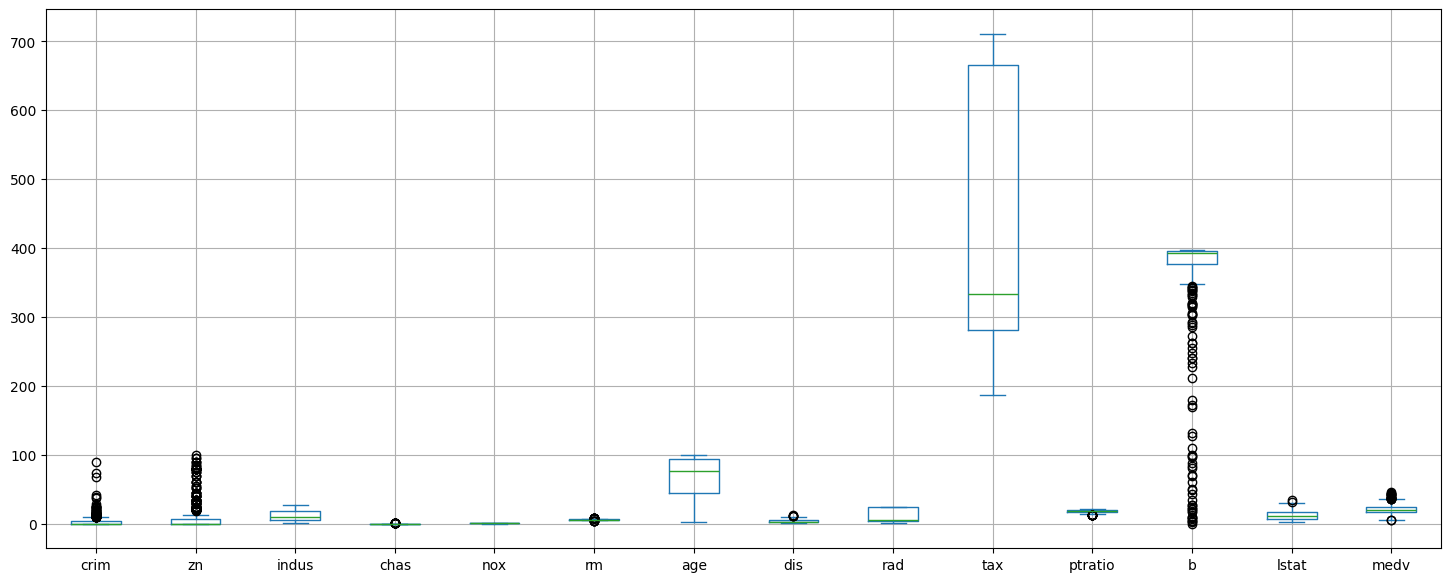

In [1289]:
df.plot.box(figsize=(18,7), grid=True);

In [1290]:
# Cortando alguns outliners
df = df[(df['crim'] <= 10) & (df['zn'] <= 30) & (df['b'] >= 370)]

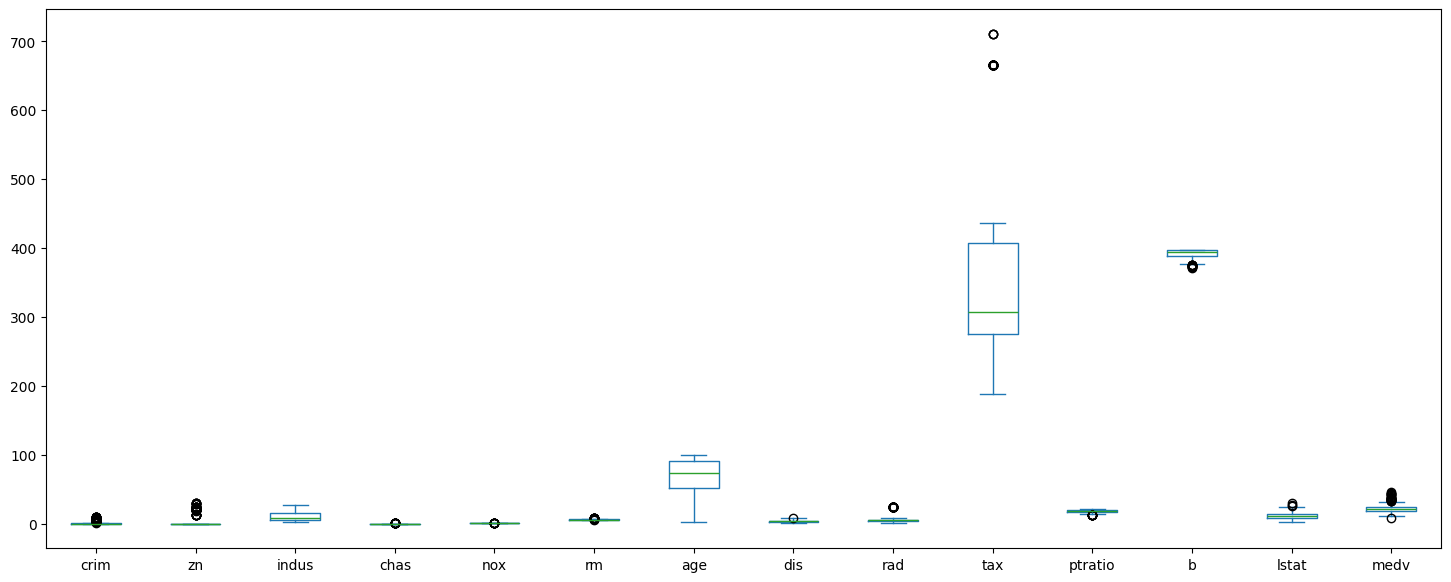

In [1291]:
# plot depois da remoção de alguns outliners
df.plot.box(figsize=(18,7));

In [1292]:
df.shape

(276, 14)

# 🤖 Linear Regression

In [1293]:
target = df['medv']
df_features = df.drop(columns='medv')

In [1294]:
df_features.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


## Correlation matrix & VIF

Verificando se existe alguma multicoliaridade entre as features (pode atrapalhar o modelo)

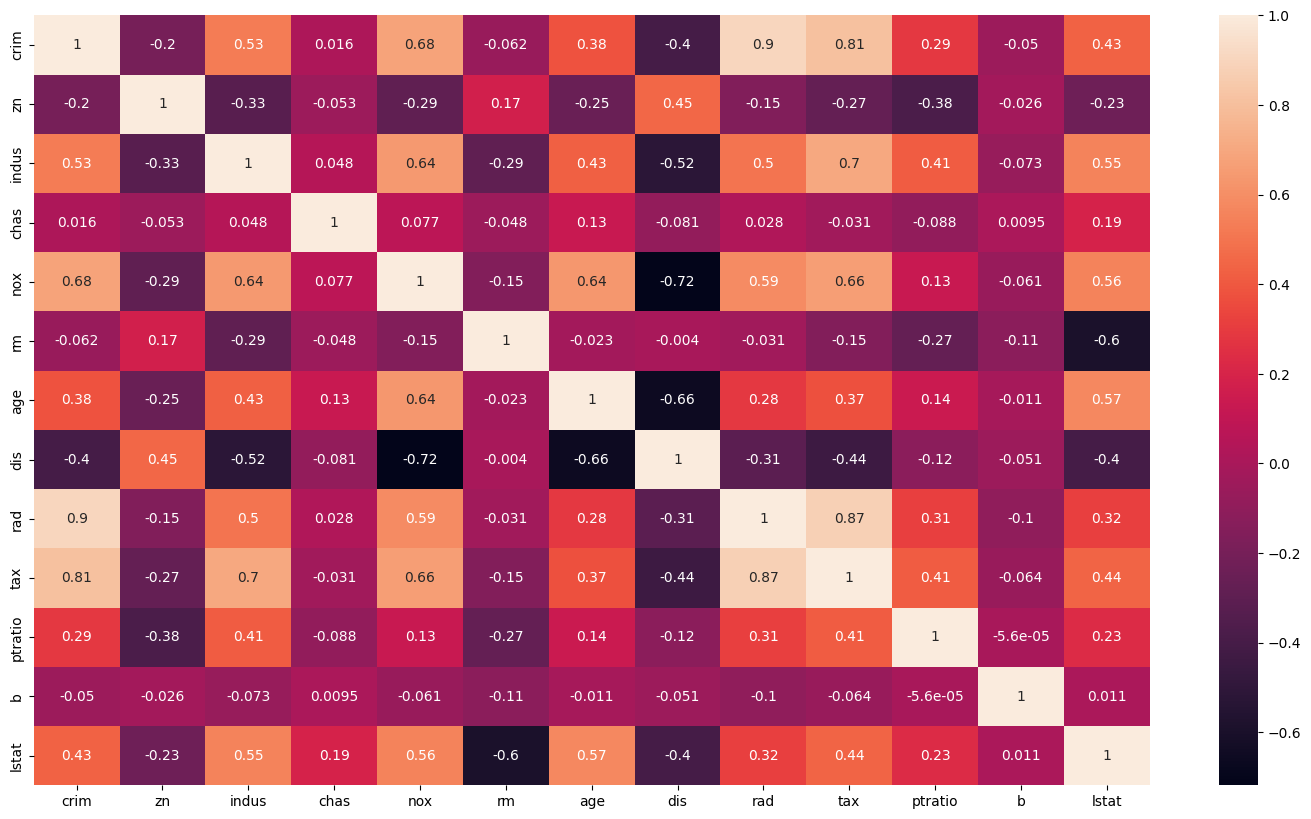

In [1295]:
plt.figure(figsize = (18,10))
sns.heatmap(df_features.corr(),annot = True)
plt.show()

Se duas variáveis forem muito correlacionadas (vou considerar acima de 0.8 ou abaixo de -0.8), vamos remove-la. <br>

Pela matrix podemos perceber:

- rad & crim = 0.91
- rad & tax = 0.87
- crim & tax = 0.81

> Removeremos a `rad` e `crim`



In [1296]:
df_features = df_features.drop(columns=['rad', 'crim'])

Vamos analisar as outras variavéis pelo cálculo dos autovalores da matriz de covariância. <br><br>
Os que tiverem valor muito baixo indicam redundância na informação trazida pela respectiva variável e, consequentemente, que existe multicolinearidade;
Fator de Inflação da Variância (VIF):

> Multicolinearidade Baixa ⇔ 0 < VIF < 5 <br>
Multicolinearidade Moderada ⇔ 5 ≤ VIF < 10 <br>
Multicolinearidade Alta ⇔ VIF ≥ 10



In [1297]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcula o VIF para cada variável independente
vif_data = pd.DataFrame()
vif_data["Variável"] = df_features.columns
vif_data["VIF"] = [variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]

vif_data

,Variável,VIF
0,zn,1.833508
1,indus,10.294910
2,chas,1.157494
3,nox,113.306241
4,rm,259.317938
5,age,22.054433
6,dis,18.524595
7,tax,18.717117
8,ptratio,147.081758
9,b,558.800336


In [1298]:
# Removerei as features com valores extremamente maiores que 10
df_features = df_features.drop(columns=['nox', 'rm', 'age', 'ptratio', 'b'])

In [1299]:
df_features

,zn,indus,chas,dis,tax,lstat
0,18.0,2.31,0,4.0900,296,4.98
1,0.0,7.07,0,4.9671,242,9.14
2,0.0,7.07,0,4.9671,242,4.03
3,0.0,2.18,0,6.0622,222,2.94
5,0.0,2.18,0,6.0622,222,5.21
...,...,...,...,...,...,...
500,0.0,9.69,0,2.4982,391,14.33
501,0.0,11.93,0,2.4786,273,9.67
502,0.0,11.93,0,2.2875,273,9.08
503,0.0,11.93,0,2.1675,273,5.64


## Standardization of the selected features

In [1300]:
scaler = StandardScaler() # Padronização
df_scaled = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(df_scaled, columns=df_features.columns, index=df_features.index)
df_scaled.head()

,zn,indus,chas,dis,tax,lstat
0,1.662821,-1.310846,-0.264135,0.199267,-0.476808,-1.320265
1,-0.461348,-0.539715,-0.264135,0.744075,-0.841255,-0.499995
2,-0.461348,-0.539715,-0.264135,0.744075,-0.841255,-1.507587
3,-0.461348,-1.331906,-0.264135,1.424293,-0.976236,-1.722513
5,-0.461348,-1.331906,-0.264135,1.424293,-0.976236,-1.274914


## Model training

In [1301]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df_scaled, target, test_size=0.2, random_state=42)

In [1302]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")

X_train: 220
X_test: 56


In [1303]:
# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

LinearRegression()

In [1304]:
# Fazer previsões com o modelo treinado
y_pred = model.predict(X_test)

In [1305]:
# Criando um DataFrame com os resultados
result_test = pd.DataFrame({'Real': y_test.values, 'Pred': y_pred})
result_test['Index'] = y_test.index
result_test

,Real,Pred,Index
0,25.3,25.423240,42
1,36.2,27.679672,181
2,19.8,18.170563,317
3,26.4,23.171140,184
4,16.5,22.469753,342
5,12.1,14.943040,402
6,30.1,27.225675,223
7,25.0,26.298946,324
8,23.7,23.503530,481
9,27.5,28.547698,222


In [1306]:
# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')

MSE: 13.955090857578949
R²: 0.632356713458261


**MSE (Mean Squared Error)**: Quanto menor o MSE, melhor o modelo, pois significa que a previsão está mais próxima dos valores reais.
   
   - **Modelo Atualizado: MSE = 13.95**  
   - Modelo Original: MSE = 24.29

**R² (Coeficiente de Determinação)**: Um valor de **R²** mais alto significa que o modelo é mais eficaz em explicar a variabilidade dos dados.
   
   - **Modelo Atualizado: R² =0.632**  
   - Modelo Original: R² = 0.669  


# 🚩 Residues & Validation of Results

### Normality of Residuals

Se os resíduos não forem normais,
esses testes podem apresentar resultados inválidos, levando a inferências incorretas.

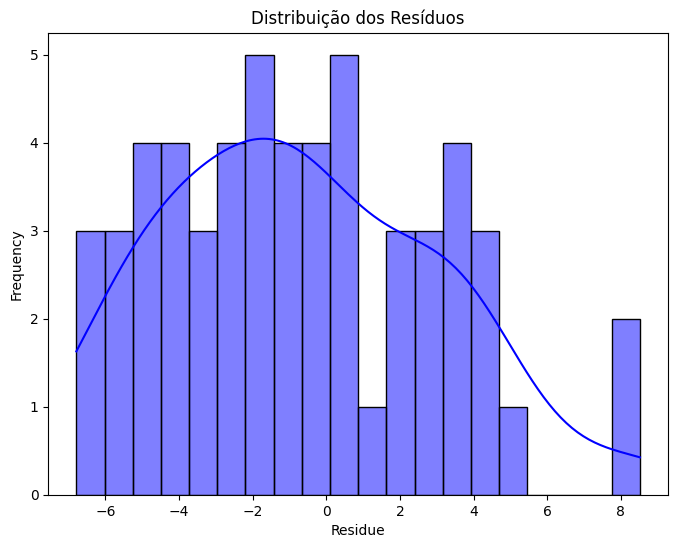

In [1307]:
# Calculando os resíduos
residue = y_test - y_pred

plt.figure(figsize=(8, 6)) # plot
sns.histplot(residue, kde=True, bins=20, color='blue')
plt.title('Distribuição dos Resíduos')
plt.xlabel('Residue')
plt.ylabel('Frequency')
plt.show()

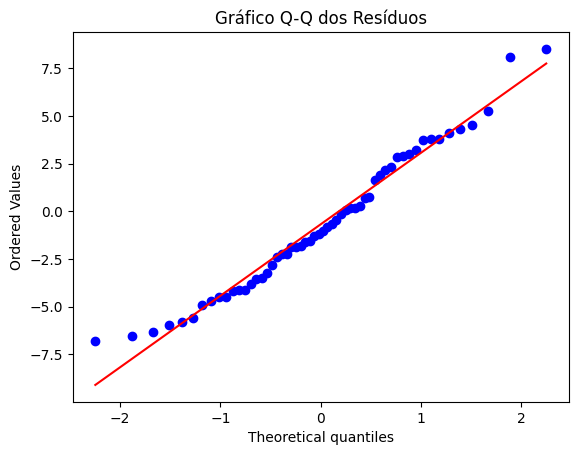

In [1308]:
stats.probplot(residue, dist="norm", plot=plt)
plt.title('Gráfico Q-Q dos Resíduos')
plt.show()

Vamos validar os resultados do nosso modelo pelo Teste Shapiro-Wilk

In [1309]:
# Teste de Shapiro-Wilk
shapiro_stat, shapiro_p_value = stats.shapiro(residue)

print(f"Estatística de Shapiro-Wilk: {shapiro_stat}")
print(f"Valor-p: {shapiro_p_value}")

if shapiro_p_value < 0.05:
    print("\nRejeitamos a hipótese nula -> Os resíduos NÃO seguem uma distribuição normal.")
else:
    print("\nNão rejeitamos a hipótese nula -> Os resíduos podem ser normalmente distribuídos.")

Estatística de Shapiro-Wilk: 0.9709112115265706
Valor-p: 0.19341631233267004

Não rejeitamos a hipótese nula -> Os resíduos podem ser normalmente distribuídos.


Como o teste Shapiro-Wilk pode ser sensível a tamanhos de amostra acima de 50, vamos realizar o teste Anderson-Darling.

In [1310]:
# Teste de Anderson-Darling
ad_result = stats.anderson(residue, dist="norm")

print(f"Estatística de Anderson-Darling: {ad_result.statistic}\n")
print("Valores críticos e níveis de significância:")
for i in range(len(ad_result.critical_values)):
    print(f" - {ad_result.critical_values[i]:.3f} (nível {ad_result.significance_level[i]}%)")

if ad_result.statistic > ad_result.critical_values[2]:  # Comparação com o nível de 5%
    print("\nRejeitamos a hipótese nula -> Os resíduos NÃO seguem uma distribuição normal.")
else:
    print("\nNão rejeitamos a hipótese nula -> Os resíduos podem ser normalmente distribuídos.")

Estatística de Anderson-Darling: 0.40206687193288815

Valores críticos e níveis de significância:
 - 0.542 (nível 15.0%)
 - 0.617 (nível 10.0%)
 - 0.740 (nível 5.0%)
 - 0.863 (nível 2.5%)
 - 1.027 (nível 1.0%)

Não rejeitamos a hipótese nula -> Os resíduos podem ser normalmente distribuídos.


### Independence Residual

Quando os resíduos não são independentes, ocorre autocorrelação, ou
seja, os erros de uma observação influenciam os erros das próximas.

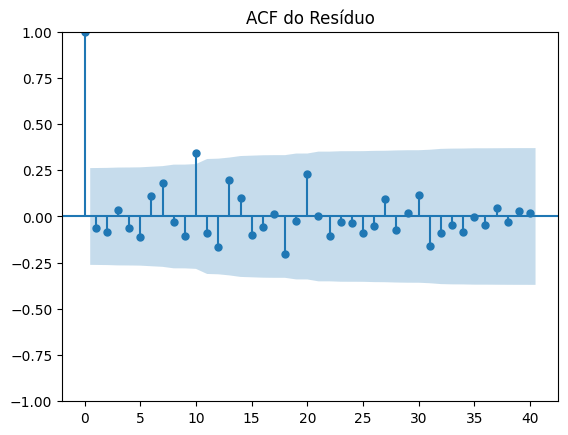

In [1311]:
# Gráfico ACF

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Supondo que 'residue' seja o resíduo calculado (y_test - y_pred)
plot_acf(residue, lags=40)  # Ajuste o número de lags conforme necessário
plt.title('ACF do Resíduo')
plt.show()

O Teste de Durbin-Watson (DW) verifica a autocorrelação serial dos resíduos de um modelo de regressão. O valor do teste varia de 0 a 4: <br>

DW ≈ 2: Não há autocorrelação. <br>
DW < 2: Autocorrelação positiva. <br>
DW > 2: Autocorrelação negativa. <br>

In [1312]:
# Testes Estatísticos: Teste de Durbin-Watson
from statsmodels.stats.stattools import durbin_watson

# Supondo que 'residue' seja o vetor dos resíduos
dw_statistic = durbin_watson(residue)
print(f"Estatística de Durbin-Watson: {dw_statistic}")

Estatística de Durbin-Watson: 2.0415886999653816


### Homoscedasticity

Se a variância dos resíduos muda para diferentes faixas de valores de
X, as previsões do modelo podem ser imprecisas em algumas regiões. O modelo pode ser menos generalizável, pois ele se ajusta de maneira
desigual para diferentes partes dos dados.

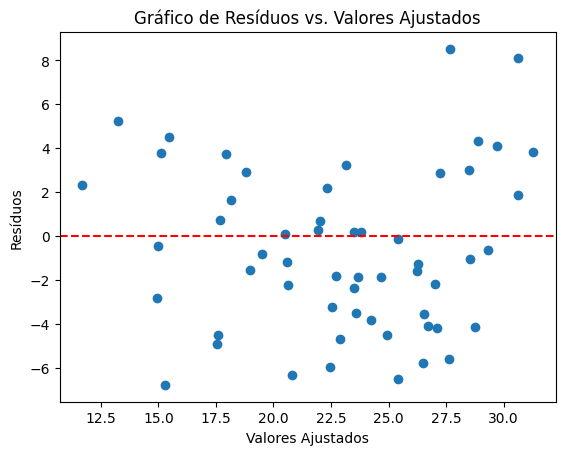

In [1313]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, residue)
plt.axhline(y=0, color='r', linestyle='--')  # Linha horizontal no valor 0
plt.title("Gráfico de Resíduos vs. Valores Ajustados")
plt.xlabel("Valores Ajustados")
plt.ylabel("Resíduos")
plt.show()

> Se os resíduos formam um padrão em funil (dispersão aumenta ou diminui), é possível que haja heterocedasticidade.


### Outliers

Outliers podem impactar negativamente a precisão, interpretação e
validação de um modelo de regressão linear.

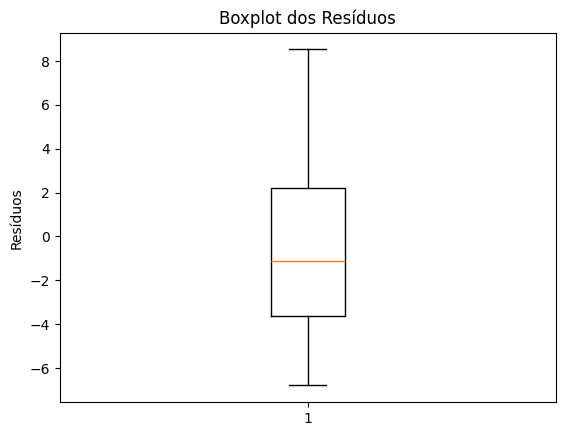

In [1314]:
plt.boxplot(residue)
plt.title('Boxplot dos Resíduos')
plt.ylabel('Resíduos')
plt.show()